In [2]:
# TODO
# Heatmap of music listening frequency
# Top 10 artists
# Valence index tendency
# Create predictive model of whether I would like a song or not

In [1]:
import pandas as pd
import numpy as np
import json
import spotipy
import spotipy.util as util
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from spotipy.oauth2 import SpotifyClientCredentials
from jsonmerge import merge
from collections import OrderedDict

In [2]:
def prepare_files(f1_path, f2_path):
    # Removing data from 2019 as analysis is for 2020 only
    with open(f1_path, 'r', encoding='utf-8') as source_file:
        data = json.load(source_file)
        new_data = [element for element in data if "2019" not in element['endTime']]
    
    new_file_path = "./data/UpdatedData.json"
    
    # Writing clean data into new file to preserve original
    with open(new_file_path, 'w', encoding='utf-8') as dest_file:
        data = json.dump(new_data, dest_file, indent=4)
        
   
    file_one = open(new_file_path, encoding='utf-8')
    file_one = json.load(file_one, encoding='utf-8')
    file_two = open(f2_path, encoding='utf-8')
    file_two = json.load(file_two, encoding='utf-8')

    # Merge both files into a single variable
    merged_data = file_one + file_two
    return merged_data

In [7]:
# NOTE: Data has already been collected, and as it does not change, I saved it on csv files to save computation time
songs_data = pd.read_csv("./Documents/personal-data-analysis/spotify-personal-data-analysis/data/SongsData.csv")
songs_data

,artist_name,track_name,end_time,ms_played,track_id
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814,3FWAZnfVEWlUBB4YyZ0lEK
1,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:15,34780,NaN
2,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:16,88514,NaN
3,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945,3FWAZnfVEWlUBB4YyZ0lEK
4,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:23,206714,NaN
...,...,...,...,...,...
15418,Acru,Crudo,2020-12-16 23:14,92115,3Y0njfS1jG0EzUDKtjvS5a
15419,Trueno,Atrevido,2020-12-16 23:37,1707,6tMqYyCVU2aKgUahMvJz2S
15420,Trueno,Atrevido,2020-12-16 23:40,194747,6tMqYyCVU2aKgUahMvJz2S
15421,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800,7FIWs0pqAYbP91WWM0vlTQ


In [5]:
# Retrieving data
# streaming_history_p1 = "./data/StreamingHistory0.json"
# streaming_history_p2 = "./data/StreamingHistory1.json"
# data = prepare_files(streaming_history_p1, streaming_history_p2)

In [6]:
# def extract_values(column_name):
#     return [i[column_name] for i in data]

# Create dataframe from data
# songs_data = pd.DataFrame()
# songs_data['artist_name'] = extract_values('artistName')
# songs_data['track_name'] = extract_values('trackName')
# songs_data['end_time'] = extract_values('endTime')
# songs_data['ms_played'] = extract_values('msPlayed')

In [7]:
# songs_data

,artist_name,track_name,end_time,ms_played
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814
1,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:15,34780
2,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:16,88514
3,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945
4,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:23,206714
...,...,...,...,...
15418,Acru,Crudo,2020-12-16 23:14,92115
15419,Trueno,Atrevido,2020-12-16 23:37,1707
15420,Trueno,Atrevido,2020-12-16 23:40,194747
15421,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800


In [8]:
# Access the spotify API
# username = 'dgtj18'
# client_id = '3424ef36fc3b45199b19d77e9db4b44c'
# client_secret = '76b735824b8949a0a1cd75b4011ad465'
# redirect_uri = 'http://localhost:7777/callback'
# scope = 'user-read-recently-played'

# token = util.prompt_for_user_token(username=username, scope=scope, client_id=client_id, client_secret=client_secret,
#                                    redirect_uri=redirect_uri)

# client_credentials_manager = SpotifyClientCredentials(client_id="3424ef36fc3b45199b19d77e9db4b44c",
#                                                      client_secret="76b735824b8949a0a1cd75b4011ad465")
# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [9]:
# Get spotify ID for every track
# def retrieve_id(track_name: str, artist: str, token: str):
#     headers = {
#         'Accept': 'application/json',
#         'Content-Type': 'application/json',
#         'Authorization': f'Bearer ' + token,
#     }
#     track_artist = track_name+ " " +artist
#     params = [
#         ('q', track_artist),
#         ('type', 'track')
#     ]
#     try:
#         response = requests.get('https://api.spotify.com/v1/search', headers = headers,
#                                params = params, timeout = 10)
#         json = response.json()
#         first_result = json['tracks']['items'][0]
#         track_id = first_result['id']
#         return track_id
#     except:
#         return None

In [10]:
# Splitting the dataframe in three to avoid credentials timeout
# data_split = np.array_split(songs_data, 10)

In [11]:
# for df in data_split:
#     token = util.prompt_for_user_token(username=username, scope=scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
#     songs_data['track_id'] = songs_data.apply(lambda x: retrieve_id(x['track_name'], 
#                                                         x['artist_name'], 
#                                                         token), axis=1)

In [8]:
# missing_id = songs_data[11130:]
# new_data_split = np.array_split(missing_id, 40)
# for df in new_data_split:
#     token = util.prompt_for_user_token(username=username, scope=scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
#     missing_id['track_id'] = missing_id.apply(lambda x: retrieve_id(x['track_name'], 
#                                                         x['artist_name'], 
#                                                         token), axis=1)

<ipython-input-8-adeaba1f251a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_id['track_id'] = missing_id.apply(lambda x: retrieve_id(x['track_name'],


In [21]:
# songs_data[11130:] = missing_id

In [11]:
# %store songs_data
# %store -r songs_data
# songs_data

no stored variable or alias songs_data


,artist_name,track_name,end_time,ms_played
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814
1,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:15,34780
2,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:16,88514
3,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945
4,4 Elementos,Cypher #1 (Reggae Cypher),2020-01-01 00:23,206714
...,...,...,...,...
15418,Acru,Crudo,2020-12-16 23:14,92115
15419,Trueno,Atrevido,2020-12-16 23:37,1707
15420,Trueno,Atrevido,2020-12-16 23:40,194747
15421,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800


In [8]:
songs_data = songs_data.dropna(axis=0, how="any", inplace=False)

In [9]:
# Delete tracks without ID
null_free_data = songs_data["track_id"].dropna()
null_free_data.sample(60)

7170     5fMOlPVPDpeOqhSSX4cnfu
7990     2vfp3rtorzJs4l9nhrP0e1
15002    48XgkAh1fkcZqA2EZWCDX6
5558     2VMzIZtoTgnKydwx6cRPq7
3961     6tMqYyCVU2aKgUahMvJz2S
11327    1VGzxJnVQND7Cg5H5wGj14
12278    7KXjTSCq5nL1LoYtL7XAwS
2272     1A6rWsVB4JNfsvVcAN2FdY
9758     2ONADYjJvqYVwjWavuY0H1
1121     7FIWs0pqAYbP91WWM0vlTQ
8011     6i0V12jOa3mr6uu4WYhUBr
2931     2XU0oxnq2qxCpomAAuJY8K
8350     4urxRqBRiaH0i20OKBsgxc
4277     28pUgp8Cifsnwrv5Mvltyz
11874    5SiZJoLXp3WOl3J4C8IK0d
3979     7lLedmf60WiIDLOmSbc5O3
4532     4nASzyRbzL5qZQuOPjQfsj
8188     2wGSgTmgSF3xjRrHkTc25R
4988     2b6i9zx3ULzKrNWmyP0ePD
10459    2FPE3JcSvRoCNSC96KAyvB
11541    6Ed1q0X8oSKSm4IIhiQbYg
8829     5aF2hoUHaU9GainPXIZDMV
13779    2byu6eeLWaBq88ZtusqU4V
12196    6C6mUonH6MNdSg5pw7kOc9
9402     6jKOxnQ1Pdsr4KblSSeA0j
2888     2kKMNRkEirl8J16ccNJImi
3005     1We9y0dSphaMHt4owfGWpw
1060     3ZUwkZWSiYxkP8kZDlxqnL
5542     5uHAzGa4d9j35DEbhUwGhi
11310    0Y3bl8IzUsGvccFu74OLPB
10827    2FPE3JcSvRoCNSC96KAyvB
2868    

In [10]:
tracks = list(OrderedDict.fromkeys(null_free_data))

In [11]:
# NOTE: Features have already been collected, so I saved to a csv file
my_features = pd.read_csv("./Documents/personal-data-analysis/spotify-personal-data-analysis/data/SongsFeatures.csv")
my_features

,song_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0.000000,0.592,200945,-3.720,0.856,1,3
1,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,0.0438,0.000013,0.676,233268,-5.253,0.812,1,9
2,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,0.0335,0.000004,0.785,166627,-6.665,0.192,1,10
3,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,0.3450,0.000000,0.854,209531,-4.490,0.342,1,1
4,3a1lNhkSLSkpJE4MSHpDu9,0.804,0.2530,123.146,0.0363,0.2150,0.000000,0.630,220293,-4.183,0.492,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,7kakp7vYlAUJAOTBYh42ic,0.733,0.0672,168.706,0.1940,0.2700,0.013200,0.616,178984,-5.568,0.465,1,2
2047,3EO0tGvdBCw6vdChaNvVlc,0.422,0.2530,138.006,0.5230,0.0377,0.000000,0.869,133880,-8.151,0.339,1,1
2048,3gZabQGRZVWdkCmhP7TYQD,0.799,0.0866,92.058,0.4990,0.7440,0.000000,0.708,140303,-7.728,0.711,0,10
2049,39eFFv5wl4sEZmBlBU7jnt,0.694,0.0232,144.962,0.0569,0.1180,0.000000,0.833,272427,-4.284,0.866,1,1


In [14]:
# my_features = pd.DataFrame(columns=["song_id","energy", "liveness","tempo","speechiness",
#                                 "acousticness","instrumentalness","danceability",
#                                 "duration_ms","loudness","valence",
#                                 "mode","key"])

# # Add features for each song
# for song in tracks:
#     features = sp.audio_features(tracks = [song])[0]
#     if features is not None:
#         my_features = my_features.append({"song_id":song,
#                                     "energy":features['energy'], 
#                                     "liveness":features['liveness'],
#                                     "tempo":features['tempo'],
#                                     "speechiness":features['speechiness'],
#                                     "acousticness":features['acousticness'],
#                                     "instrumentalness":features['instrumentalness'],
#                                     "danceability":features['danceability'],
#                                     "duration_ms":features['duration_ms'],
#                                     "loudness":features['loudness'],
#                                     "valence":features['valence'],
#                                     "mode":features['mode'],
#                                     "key":features["key"],
#                                  },ignore_index=True)
#     else:
#         pass

In [15]:
# %store my_features
# %store -r my_features
# my_features

,song_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0,0.592,200945,-3.720,0.856,1,3
1,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,0.0438,1.26e-05,0.676,233268,-5.253,0.812,1,9
2,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,0.0335,4.36e-06,0.785,166627,-6.665,0.192,1,10
3,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,0.3450,0,0.854,209531,-4.490,0.342,1,1
4,3a1lNhkSLSkpJE4MSHpDu9,0.804,0.2530,123.146,0.0363,0.2150,0,0.630,220293,-4.183,0.492,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,7kakp7vYlAUJAOTBYh42ic,0.733,0.0672,168.706,0.1940,0.2700,0.0132,0.616,178984,-5.568,0.465,1,2
2047,3EO0tGvdBCw6vdChaNvVlc,0.422,0.2530,138.006,0.5230,0.0377,0,0.869,133880,-8.151,0.339,1,1
2048,3gZabQGRZVWdkCmhP7TYQD,0.799,0.0866,92.058,0.4990,0.7440,0,0.708,140303,-7.728,0.711,0,10
2049,39eFFv5wl4sEZmBlBU7jnt,0.694,0.0232,144.962,0.0569,0.1180,0,0.833,272427,-4.284,0.866,1,1


In [12]:
# Merge Ids with the rest of the song info
my_streaming_data = pd.merge(songs_data, my_features, how="left", left_on="track_id", right_on="song_id")
my_streaming_data

,artist_name,track_name,end_time,ms_played,track_id,song_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0.000000,0.592,200945,-3.720,0.856,1,3
1,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0.000000,0.592,200945,-3.720,0.856,1,3
2,Los Pericos,Runaway,2020-01-01 00:27,233267,0ZLakHzHWqUIlkeDa4i8aC,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,0.0438,0.000013,0.676,233268,-5.253,0.812,1,9
3,Iggy Azalea,Kream (feat. Tyga),2020-01-01 00:27,7032,5mu1uv8RmzDkF8foePK5qa,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,0.0335,0.000004,0.785,166627,-6.665,0.192,1,10
4,Duki,She Don't Give a Fo,2020-01-01 00:29,117738,03a359wbiUsjN9h6yzXvmS,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,0.3450,0.000000,0.854,209531,-4.490,0.342,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,Acru,Crudo,2020-12-16 23:14,92115,3Y0njfS1jG0EzUDKtjvS5a,3Y0njfS1jG0EzUDKtjvS5a,0.827,0.2230,93.967,0.2130,0.0657,0.000000,0.687,224681,-4.247,0.848,0,6
15113,Trueno,Atrevido,2020-12-16 23:37,1707,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,0.2360,0.000000,0.864,194748,-5.489,0.858,1,8
15114,Trueno,Atrevido,2020-12-16 23:40,194747,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,0.2360,0.000000,0.864,194748,-5.489,0.858,1,8
15115,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800,7FIWs0pqAYbP91WWM0vlTQ,7FIWs0pqAYbP91WWM0vlTQ,0.745,0.2920,165.995,0.3420,0.1450,0.000000,0.808,210800,-5.260,0.829,0,10


In [13]:
# Delete songs that played for 0ms
my_streaming_data.drop(my_streaming_data[my_streaming_data["ms_played"]==0].index, inplace=True)
my_streaming_data

,artist_name,track_name,end_time,ms_played,track_id,song_id,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0.000000,0.592,200945,-3.720,0.856,1,3
1,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,0.6990,0.000000,0.592,200945,-3.720,0.856,1,3
2,Los Pericos,Runaway,2020-01-01 00:27,233267,0ZLakHzHWqUIlkeDa4i8aC,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,0.0438,0.000013,0.676,233268,-5.253,0.812,1,9
3,Iggy Azalea,Kream (feat. Tyga),2020-01-01 00:27,7032,5mu1uv8RmzDkF8foePK5qa,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,0.0335,0.000004,0.785,166627,-6.665,0.192,1,10
4,Duki,She Don't Give a Fo,2020-01-01 00:29,117738,03a359wbiUsjN9h6yzXvmS,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,0.3450,0.000000,0.854,209531,-4.490,0.342,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,Acru,Crudo,2020-12-16 23:14,92115,3Y0njfS1jG0EzUDKtjvS5a,3Y0njfS1jG0EzUDKtjvS5a,0.827,0.2230,93.967,0.2130,0.0657,0.000000,0.687,224681,-4.247,0.848,0,6
15113,Trueno,Atrevido,2020-12-16 23:37,1707,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,0.2360,0.000000,0.864,194748,-5.489,0.858,1,8
15114,Trueno,Atrevido,2020-12-16 23:40,194747,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,0.2360,0.000000,0.864,194748,-5.489,0.858,1,8
15115,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800,7FIWs0pqAYbP91WWM0vlTQ,7FIWs0pqAYbP91WWM0vlTQ,0.745,0.2920,165.995,0.3420,0.1450,0.000000,0.808,210800,-5.260,0.829,0,10


In [14]:
# Scale feature to between 0 and 1 using normalization
def scale_feature(df, col):
    max_val = df[col].max()
    min_val = df[col].min()
    val_range = max_val - min_val
    df[col+'_adj']=df[col].apply(lambda x: ((x-min_val)/(max_val-min_val)))
    return

scale_feature(my_streaming_data, 'loudness')
my_streaming_data['loudness_adj']

0        0.897142
1        0.897142
2        0.860993
3        0.827698
4        0.878985
           ...   
15112    0.884715
15113    0.855428
15114    0.855428
15115    0.860828
15116    0.916643
Name: loudness_adj, Length: 14994, dtype: float64

In [15]:
my_streaming_data['date'] = my_streaming_data.apply(lambda x: pd.to_datetime(x['end_time'][:10],format='%Y-%m-%d'),axis=1)
my_streaming_data['mins_played'] = my_streaming_data.apply(lambda x: round(x['ms_played']/60000,2), axis=1)
my_streaming_data

,artist_name,track_name,end_time,ms_played,track_id,song_id,energy,liveness,tempo,speechiness,...,instrumentalness,danceability,duration_ms,loudness,valence,mode,key,loudness_adj,date,mins_played
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,...,0.000000,0.592,200945,-3.720,0.856,1,3,0.897142,2020-01-01,0.73
1,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,...,0.000000,0.592,200945,-3.720,0.856,1,3,0.897142,2020-01-01,3.35
2,Los Pericos,Runaway,2020-01-01 00:27,233267,0ZLakHzHWqUIlkeDa4i8aC,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,...,0.000013,0.676,233268,-5.253,0.812,1,9,0.860993,2020-01-01,3.89
3,Iggy Azalea,Kream (feat. Tyga),2020-01-01 00:27,7032,5mu1uv8RmzDkF8foePK5qa,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,...,0.000004,0.785,166627,-6.665,0.192,1,10,0.827698,2020-01-01,0.12
4,Duki,She Don't Give a Fo,2020-01-01 00:29,117738,03a359wbiUsjN9h6yzXvmS,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,...,0.000000,0.854,209531,-4.490,0.342,1,1,0.878985,2020-01-01,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,Acru,Crudo,2020-12-16 23:14,92115,3Y0njfS1jG0EzUDKtjvS5a,3Y0njfS1jG0EzUDKtjvS5a,0.827,0.2230,93.967,0.2130,...,0.000000,0.687,224681,-4.247,0.848,0,6,0.884715,2020-12-16,1.54
15113,Trueno,Atrevido,2020-12-16 23:37,1707,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,...,0.000000,0.864,194748,-5.489,0.858,1,8,0.855428,2020-12-16,0.03
15114,Trueno,Atrevido,2020-12-16 23:40,194747,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,...,0.000000,0.864,194748,-5.489,0.858,1,8,0.855428,2020-12-16,3.25
15115,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800,7FIWs0pqAYbP91WWM0vlTQ,7FIWs0pqAYbP91WWM0vlTQ,0.745,0.2920,165.995,0.3420,...,0.000000,0.808,210800,-5.260,0.829,0,10,0.860828,2020-12-16,3.51


In [22]:
# FINISHED DATA MANIPULATION STAGE

In [16]:
# Getting averages for interesting features in songs

def get_feature_average(df, feature):
    return df[feature].mean()

features_of_interest = ["energy", "liveness", "speechiness", "acousticness", "instrumentalness", "danceability", "loudness_adj"]
features_average = list()
for feature in features_of_interest:
    features_average.append(get_feature_average(my_streaming_data, feature=feature))

In [17]:
# Create radar chart
radar_data = pd.DataFrame(dict(
    r=features_average,
    theta=features_of_interest))
fig = px.line_polar(radar_data, r='r', theta='theta', line_close=True, title="Comparison between tracks features", 
                    color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(fill='toself')
fig.show()

In [18]:
# Top ten artists
total_played = my_streaming_data.groupby(["artist_name"], as_index=False).agg({"ms_played": sum})
total_played = total_played.sort_values(by=["ms_played"], ascending=False)
total_played['ms_played'] = total_played['ms_played'].apply(lambda x: round((x/3600000), 2))
total_played.rename(columns={'artist_name': 'Artist', 'ms_played': 'Hours played'}, inplace=True)
top_ten = total_played[:10].reset_index(drop=True)
top_ten

,Artist,Hours played
0,Acru,56.73
1,Eminem,49.08
2,Duki,38.82
3,Trueno,37.79
4,Three Days Grace,33.97
5,Red Bull Batalla de los Gallos,26.17
6,Bad Bunny,23.01
7,Bizarrap,21.03
8,WOS,20.10
9,Cypress Hill,17.69


In [19]:
# Total time played
total_time_played = round((my_streaming_data['ms_played'].sum())/3600000, 2)
print(f'I spent aproximately {total_time_played} hours listening to music on Spotify in 2020!')

I spent aproximately 734.56 hours listening to music on Spotify in 2020!


In [20]:
sorted_data = my_streaming_data.sort_values(by='date', ascending=True)
mood = pd.DataFrame({'valence' : sorted_data.groupby(sorted_data['date'].dt.strftime('%B'))['valence'].mean()}).reset_index() 
mood_months = pd.DataFrame({
    "date": ["January", "February", "March", "April", "May","June", "July", "August", "September", "October", "November", "December"]
})

sorted_mood = pd.merge(mood_months, mood,left_on='date',right_on='date',how='outer')

sorted_mood

,date,valence
0,January,0.513104
1,February,0.473051
2,March,0.526959
3,April,0.583205
4,May,0.539279
5,June,0.544091
6,July,0.542101
7,August,0.567573
8,September,0.479353
9,October,0.520148


In [21]:
months = ["January", "February", "March", "April", "May","June", "July", "August", "September", "October", "November", "December"]
line_plt = px.line(sorted_mood, x=months, y="valence", title='Valence Index Trend  - 2020')
line_plt.show()

In [ ]:
# lOOKS LIKE AUGUST WAS ROUGH!

In [22]:
# Heatmap of listened miutes by day

# New dataframe for listened minutes by day
idx = pd.DataFrame(pd.date_range(min(my_streaming_data.date), max(my_streaming_data.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# Daily Streaming time
daily_length = my_streaming_data.groupby('date',as_index=True).sum()

# Merge with full data for each day
new_daily_length = pd.merge(idx,daily_length,how='left',left_on='date',right_on = 'date',copy=False)
new_daily_length

,date,ms_played,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key,loudness_adj,mins_played
0,2020-01-01,14435206.0,49.350,16.4975,8641.265,12.9591,16.677500,1.553568,48.874,17837974.0,-398.711,41.5080,43.0,364.0,61.508230,240.57
1,2020-01-02,3679992.0,21.158,5.6686,3750.518,4.9328,6.517000,0.693159,22.985,7281596.0,-162.403,16.8260,16.0,163.0,26.701165,61.34
2,2020-01-03,5022925.0,16.387,3.4872,3417.324,4.7715,5.967100,0.000211,19.212,5551669.0,-155.961,13.3400,16.0,137.0,21.928763,83.73
3,2020-01-04,8833117.0,32.418,7.6806,6452.758,7.3776,5.924920,0.000713,29.532,10444344.0,-283.990,22.3980,25.0,251.0,39.591869,147.22
4,2020-01-05,7018448.0,28.701,8.6991,5337.383,6.7867,9.179604,0.086149,27.292,8949997.0,-249.237,21.5950,22.0,221.0,35.487054,116.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2020-12-12,3485337.0,11.409,4.3365,1777.071,4.1434,3.917635,0.013820,12.057,3855843.0,-102.164,8.3820,11.0,87.0,14.333569,58.08
347,2020-12-13,1819662.0,5.373,1.7672,1003.792,2.1438,1.128400,0.002332,6.092,1936361.0,-51.793,5.7000,2.0,66.0,6.657588,30.32
348,2020-12-14,647625.0,1.870,0.4587,395.233,0.8670,1.180300,0.000080,2.435,747568.0,-19.325,1.8460,3.0,8.0,2.498892,10.79
349,2020-12-15,9120419.0,39.221,11.2389,6716.357,11.7750,15.952935,0.114599,41.223,12038257.0,-382.302,30.6519,36.0,274.0,49.091964,152.00


In [23]:
data = new_daily_length.groupby('date',as_index=True).sum()['mins_played']
data

date
2020-01-01    240.57
2020-01-02     61.34
2020-01-03     83.73
2020-01-04    147.22
2020-01-05    116.96
               ...  
2020-12-12     58.08
2020-12-13     30.32
2020-12-14     10.79
2020-12-15    152.00
2020-12-16     76.57
Name: mins_played, Length: 351, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


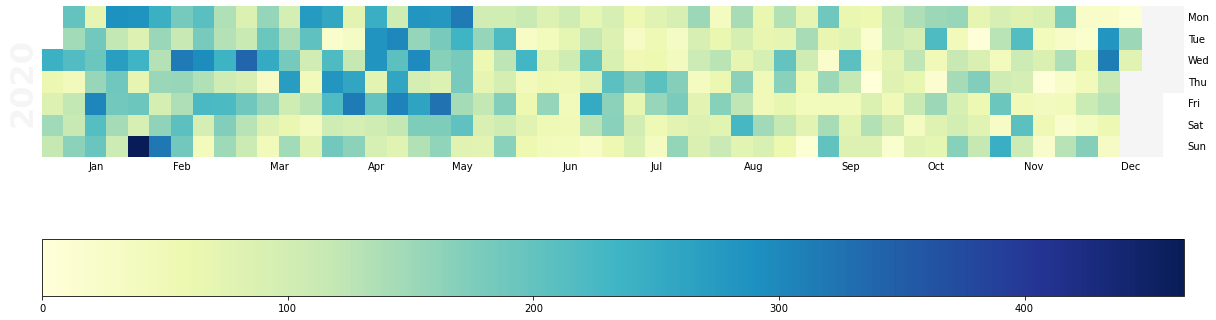

In [25]:
from matplotlib.pyplot import figure
import calmap
%matplotlib inline
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax=calmap.calendarplot(new_daily_length.groupby('date',as_index=True).sum()['mins_played'], cmap='YlGnBu', linewidth=0, fig_kws=dict(figsize=(17,8)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(),orientation='horizontal')

In [ ]:
# Amazing! I didn-t even realize I had used Spotify so litte since May.

In [ ]:
## Data analysis phase completed!
## I will now create the data to create the predictive model in another notebook.

In [36]:
prediction_data = my_streaming_data.copy()
play_avg = round(prediction_data["ms_played"].mean(), 2)
min_avg = play_avg - play_avg*0.10
prediction_data["liked"] = prediction_data["ms_played"] >= (min_avg)
prediction_data

,artist_name,track_name,end_time,ms_played,track_id,song_id,energy,liveness,tempo,speechiness,...,danceability,duration_ms,loudness,valence,mode,key,loudness_adj,date,mins_played,liked
0,El Ezequiel,Tres Gallitos,2020-01-01 00:14,43814,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,...,0.592,200945,-3.720,0.856,1,3,0.897142,2020-01-01,0.73,False
1,El Ezequiel,Tres Gallitos,2020-01-01 00:19,200945,3FWAZnfVEWlUBB4YyZ0lEK,3FWAZnfVEWlUBB4YyZ0lEK,0.542,0.1550,85.150,0.0354,...,0.592,200945,-3.720,0.856,1,3,0.897142,2020-01-01,3.35,True
2,Los Pericos,Runaway,2020-01-01 00:27,233267,0ZLakHzHWqUIlkeDa4i8aC,0ZLakHzHWqUIlkeDa4i8aC,0.731,0.6240,150.151,0.0368,...,0.676,233268,-5.253,0.812,1,9,0.860993,2020-01-01,3.89,True
3,Iggy Azalea,Kream (feat. Tyga),2020-01-01 00:27,7032,5mu1uv8RmzDkF8foePK5qa,5mu1uv8RmzDkF8foePK5qa,0.425,0.1080,174.028,0.1370,...,0.785,166627,-6.665,0.192,1,10,0.827698,2020-01-01,0.12,False
4,Duki,She Don't Give a Fo,2020-01-01 00:29,117738,03a359wbiUsjN9h6yzXvmS,03a359wbiUsjN9h6yzXvmS,0.556,0.1650,119.938,0.1400,...,0.854,209531,-4.490,0.342,1,1,0.878985,2020-01-01,1.96,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,Acru,Crudo,2020-12-16 23:14,92115,3Y0njfS1jG0EzUDKtjvS5a,3Y0njfS1jG0EzUDKtjvS5a,0.827,0.2230,93.967,0.2130,...,0.687,224681,-4.247,0.848,0,6,0.884715,2020-12-16,1.54,False
15113,Trueno,Atrevido,2020-12-16 23:37,1707,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,...,0.864,194748,-5.489,0.858,1,8,0.855428,2020-12-16,0.03,False
15114,Trueno,Atrevido,2020-12-16 23:40,194747,6tMqYyCVU2aKgUahMvJz2S,6tMqYyCVU2aKgUahMvJz2S,0.640,0.3740,135.021,0.1060,...,0.864,194748,-5.489,0.858,1,8,0.855428,2020-12-16,3.25,True
15115,Eminem,Godzilla (feat. Juice WRLD),2020-12-16 23:44,210800,7FIWs0pqAYbP91WWM0vlTQ,7FIWs0pqAYbP91WWM0vlTQ,0.745,0.2920,165.995,0.3420,...,0.808,210800,-5.260,0.829,0,10,0.860828,2020-12-16,3.51,True


In [37]:
file_name = './Documents/personal-data-analysis/spotify-personal-data-analysis/data/FullData.csv'
prediction_data.to_csv(file_name, encoding='utf-8', index=False)